In [3]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.2.0
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 6.1.12
jupyter_core     : 4.9.2
jupyter_server   : 1.13.5
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.8
qtconsole        : 5.3.0
traitlets        : 5.1.1


In [4]:
# import visuals as vp
!pip install visualpython
!visualpy install

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# import visuals as vp
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import *

In [21]:
df = pd.read_csv('dermatology.csv',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       366 non-null    int64 
 1   1       366 non-null    int64 
 2   2       366 non-null    int64 
 3   3       366 non-null    int64 
 4   4       366 non-null    int64 
 5   5       366 non-null    int64 
 6   6       366 non-null    int64 
 7   7       366 non-null    int64 
 8   8       366 non-null    int64 
 9   9       366 non-null    int64 
 10  10      366 non-null    int64 
 11  11      366 non-null    int64 
 12  12      366 non-null    int64 
 13  13      366 non-null    int64 
 14  14      366 non-null    int64 
 15  15      366 non-null    int64 
 16  16      366 non-null    int64 
 17  17      366 non-null    int64 
 18  18      366 non-null    int64 
 19  19      366 non-null    int64 
 20  20      366 non-null    int64 
 21  21      366 non-null    int64 
 22  22      366 non-null    in

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [23]:
#check for null values
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

In [24]:
sum(df.duplicated())

0

In [26]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,34
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [29]:

newNames =['erythema','scaling','definite_borders','itching','koebner_phenomenon','polygonal_papules','follicular_papules','oral_mucosal_involvement','knee_elbow_involvement','scalp_involvement','family_history','melanin','eosinophilis','PNL','fibrosis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing','elongation','suprapapillary_epidermis','spongiform_pustule','munro_microabcess','focal_hypergranulosis','granular_layer','basal_layer','spongiosis','sawtooth','follicular','perifollicular','inflammatory_monoluclear','band-like infiltrate','Age','target']

for i in range(35):
    df.rename(columns={i: newNames[i]},inplace=True)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,granular_layer,basal_layer,spongiosis,sawtooth,follicular,perifollicular,inflammatory_monoluclear,band-like infiltrate,Age,target
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [79]:
df = df.loc[df.Age!='?']
df.shape

(358, 246)

In [31]:
df.Age = df.Age.astype('int64')

In [32]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,granular_layer,basal_layer,spongiosis,sawtooth,follicular,perifollicular,inflammatory_monoluclear,band-like infiltrate,Age,target
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [33]:
group_map={1:'psoriasis',2:'seboreic_dermatitis',3:'lichen_planus',4:'pityriasis_rosea',5:'cronic_dermatitis',6:'pityriasis_rubra'}
df['target']=df['target'].map(group_map)

Text(0.5, 0, 'Skin Disease')

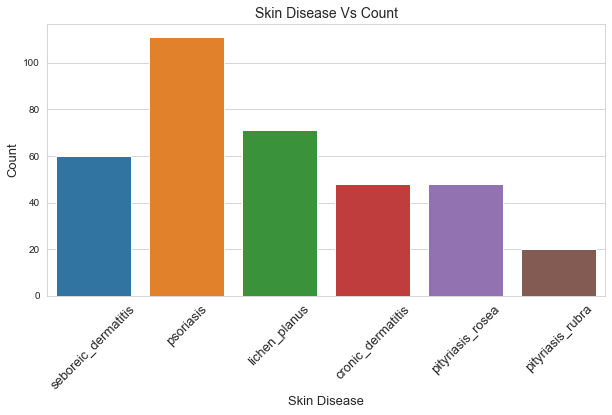

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(df['target'])
plt.xticks(rotation=45,fontsize=13)
plt.title('Skin Disease Vs Count',fontsize=14)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Skin Disease',fontsize=13)

Text(0.5, 1.0, 'Distribution Of Age According Skin Disease')

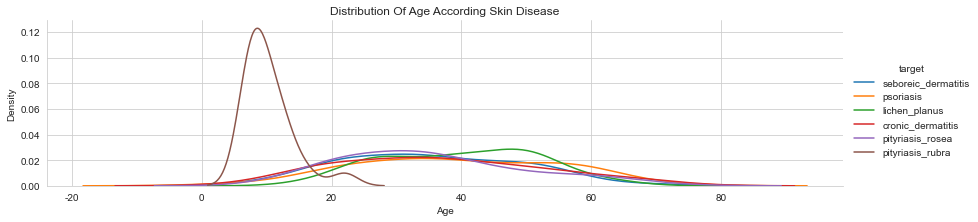

In [44]:
facet = sns.FacetGrid(df,hue="target",aspect=4)
facet.map(sns.kdeplot,'Age',shade= False).add_legend()
plt.title('Distribution Of Age According Skin Disease')

Text(0.5, 1.0, 'Skin Disease Vs Itching Factor')

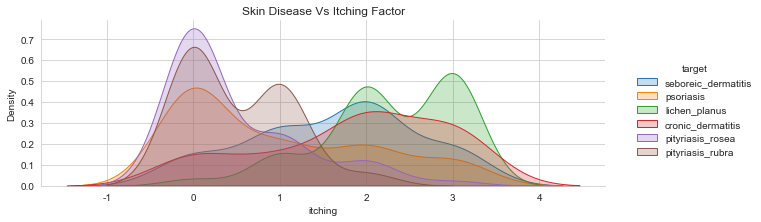

In [46]:
sns.FacetGrid(df,hue='target',aspect=3,margin_titles=True).map(sns.kdeplot,'itching',shade=True).add_legend()
plt.title('Skin Disease Vs Itching Factor')

0    314
1     44
Name: family_history, dtype: int64


Text(0.5, 1.0, 'Family History Vs Count')

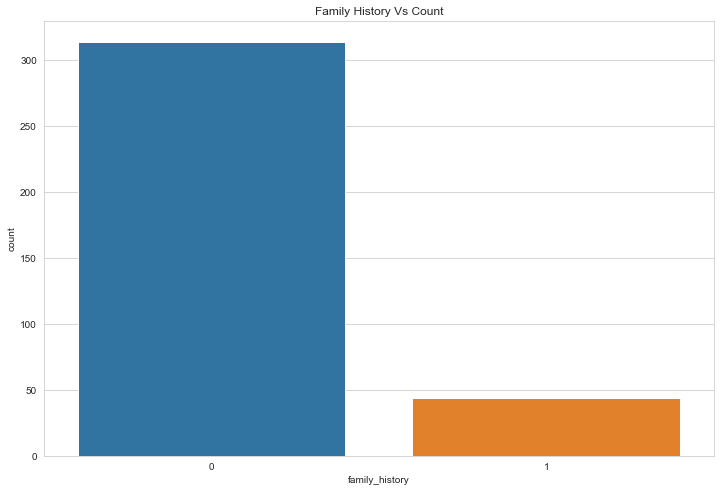

In [47]:
print(df.family_history.value_counts())
sns.countplot(df.family_history)
plt.title('Family History Vs Count')

Text(0.5, 0, 'Skin Disease')

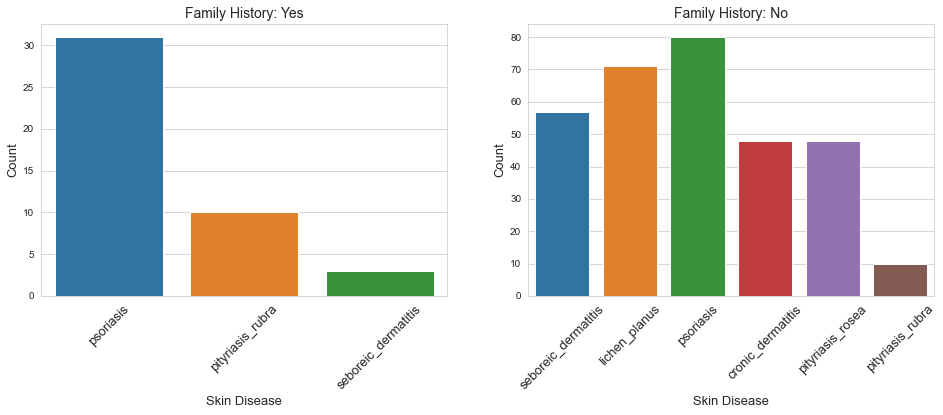

In [48]:
family_h = df.loc[df.family_history==1]
family_nh = df.loc[df.family_history==0]
fig = plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(family_h['target'])
plt.xticks(rotation=45,fontsize=13)
plt.title('Family History: Yes',fontsize=14)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Skin Disease',fontsize=13)
plt.subplot(122)
sns.countplot(family_nh['target'])
plt.title('Family History: No',fontsize=14)
plt.xticks(rotation=45,fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Skin Disease',fontsize=13)

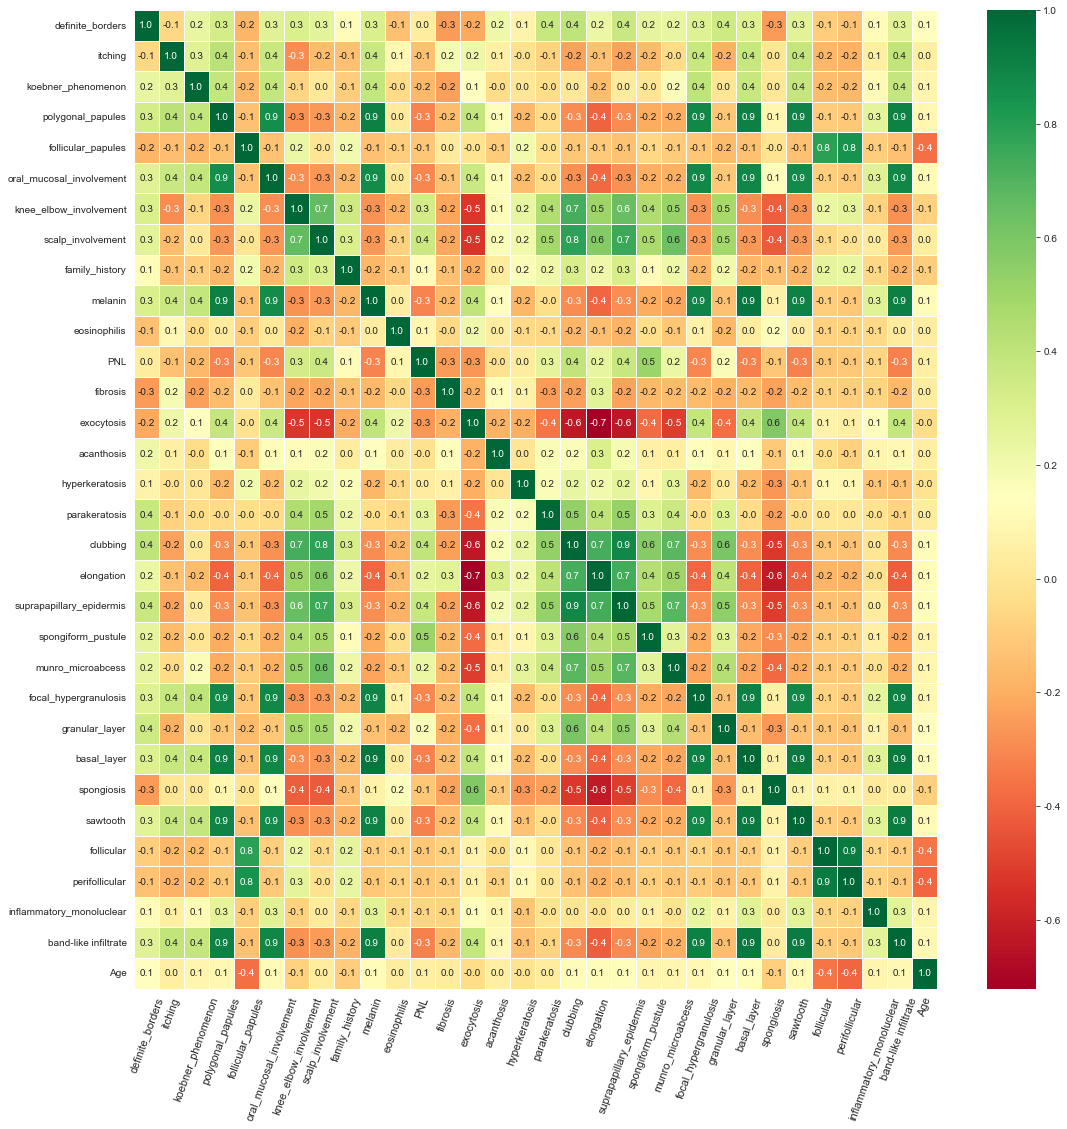

In [49]:
fig = plt.figure(figsize=(18, 18))
sns.heatmap(df.iloc[:,2:].corr(),cmap="RdYlGn",annot=True, linewidths=.5, fmt= '.1f')
plt.xticks(fontsize=11,rotation=70)
plt.show()

In [52]:
for element in newNames:
    if (element != "Age")and (element != "family_history") and (element != "target"):
        df.loc[df.loc[:, element]== 0, element] = "absent"
        df.loc[df.loc[:, element]== 1, element] = "Low"
        df.loc[df.loc[:, element]== 2, element] = "Medium"
        df.loc[df.loc[:, element]== 3, element] = "High"
    elif (element == "family_history"):
        df.loc[df.loc[:, element] == 0, element] = "NO"
        df.loc[df.loc[:, element] == 1, element] = "YES"
    elif (element == "target"):
        df.loc[df.loc[:, element]== 1, element] = "target[0]"
        df.loc[df.loc[:, element]== 2, element] = "target[1]"
        df.loc[df.loc[:, element]== 3, element] = "target[2]"
        df.loc[df.loc[:, element]== 4, element] = "target[3]"
        df.loc[df.loc[:, element]== 5, element] = "target[4]"
        df.loc[df.loc[:, element]== 6, element] = "target[5]"
    else:
        pass

In [53]:
#checking the number of data in each category to determine possibility of consolidation
for element in newNames:
    if element != "Age":
        print(df.loc[:, element].value_counts())
        df.loc[df.loc[:, "band-like infiltrate"] == "Low", "band-like infiltrate"] = "absent"
        df.loc[df.loc[:, "perifollicular"] == "Low", "perifollicular"] = "Medium"
        df.loc[df.loc[:, "parakeratosis"] == "Low", "parakeratosis"] = "Medium"
        df.loc[df.loc[:, "follicular"] == "Medium", "follicular"] = "Low"
        df.loc[df.loc[:, "sawtooth"] == "Low", "sawtooth"] = "Medium"
        df.loc[df.loc[:, "spongiosis"] == "Low", "spongiosis"] = "Medium"
        df.loc[df.loc[:, "fibrosis"] == "Low", "fibrosis"] = "Medium"
        df.loc[df.loc[:, "eosinophilis"] == "Medium","eosinophilis" ] = "Low"
        df.loc[df.loc[:, "melanin"] == "Low", "melanin"] = "Medium"
        df.loc[df.loc[:, "oral_mucosal_involvement"] == "Low", "oral_mucosal_involvement"] = "Medium"
        df.loc[df.loc[:, "polygonal_papules"] == "Low", "polygonal_papules"] = "absent"
for i in newNames:
    if (i != "Age") and (i != "target") and (i != "family_history"):
        for element in df.loc[:, i].unique():
            df.loc[:, str(i) + str(element)] = (df.loc[:, i] == element).astype(int)
df.shape

Medium    210
High       90
Low        54
absent      4
Name: erythema, dtype: int64
Medium    193
Low       105
High       52
absent      8
Name: scaling, dtype: int64
Medium    167
Low        90
absent     55
High       46
Name: definite_borders, dtype: int64
absent    116
Medium     97
High       73
Low        72
Name: itching, dtype: int64
absent    218
Low        70
Medium     52
High       18
Name: koebner_phenomenon, dtype: int64
absent    291
Medium     41
High       26
Name: polygonal_papules, dtype: int64
absent    325
Medium     16
Low        11
High        6
Name: follicular_papules, dtype: int64
absent    292
Medium     53
High       13
Name: oral_mucosal_involvement, dtype: int64
absent    245
Medium     64
Low        26
High       23
Name: knee_elbow_involvement, dtype: int64
absent    256
Medium     56
Low        30
High       16
Name: scalp_involvement, dtype: int64
NO     314
YES     44
Name: family_history, dtype: int64
absent    289
Medium     53
High       16
Name:

(358, 278)

In [54]:
for i in newNames:
    if (i != "Age") and (i != "target") and (i != "family_history"):
        df = df.drop(i, axis = 1)
df.shape

(358, 246)

In [60]:
#Encodes the categorical variables in diagnosis
labelencoder = LabelEncoder()
for i in newNames:
    if (i == "target") or (i == "family_history"):
        df.loc[:, i] = labelencoder.fit_transform(df.loc[:, i])

In [61]:
#changes the index of outcome column
df = df.reindex(list([a for a in df.columns if a != 'target'] + ['target']), axis=1)
n = len(df.columns) #determines the number of columns in dataset
X = df.iloc[:, :(n-1)].values
Y = df.iloc[:, (n-1)].values
y = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5]) #binerize target column for calculating fpr, tpr and threshold
n_classes = y.shape[1]
#shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = OneVsRestClassifier(GaussianNB()) #predict each class against the other

In [81]:
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
probas = classifier.predict_proba(X_test)
#compute ROC Curve for each class
fpr=dict()
tpr=dict()
roc_auc=dict()
th=dict()
CM = dict()
P = dict()
R = dict ()
F1 = dict()
for i in range(n_classes):
    fpr[i],tpr[i],th[i]=roc_curve(y_test[:,i],probas[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    CM[i] = confusion_matrix (y_test[:, i], y_predict[:, i])
    print ('Confusion matrix (GaussianNB) for class', i, 'vs other classes: \n', CM[i])
    print("GaussianNB | Probability Threshold for class",i,"\n",th[i])
    P[i] = precision_score(y_test[:, i], y_predict[:, i])
    print ("\nPrecision:", np.round(P[i], 3))
    R[i] = recall_score(y_test[:, i], y_predict[:, i])
    print ("\nRecall:", np.round(R[i], 3))
    F1[i] = f1_score(y_test[:, i], y_predict[:, i])
    print ("\nF1 score:", np.round(F1[i], 3))

Confusion matrix (GaussianNB) for class 0 vs other classes: 
 [[95  0]
 [ 1 12]]
GaussianNB | Probability Threshold for class 0 
 [2. 1. 0.]

Precision: 1.0

Recall: 0.923

F1 score: 0.96
Confusion matrix (GaussianNB) for class 1 vs other classes: 
 [[82  0]
 [ 0 26]]
GaussianNB | Probability Threshold for class 1 
 [2. 1. 0.]

Precision: 1.0

Recall: 1.0

F1 score: 1.0
Confusion matrix (GaussianNB) for class 2 vs other classes: 
 [[92  4]
 [ 1 11]]
GaussianNB | Probability Threshold for class 2 
 [2. 1. 0.]

Precision: 0.733

Recall: 0.917

F1 score: 0.815
Confusion matrix (GaussianNB) for class 3 vs other classes: 
 [[100   0]
 [  2   6]]
GaussianNB | Probability Threshold for class 3 
 [2. 1. 0.]

Precision: 1.0

Recall: 0.75

F1 score: 0.857
Confusion matrix (GaussianNB) for class 4 vs other classes: 
 [[70  2]
 [ 1 35]]
GaussianNB | Probability Threshold for class 4 
 [2. 1. 0.]

Precision: 0.946

Recall: 0.972

F1 score: 0.959
Confusion matrix (GaussianNB) for class 5 vs other cl

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

0


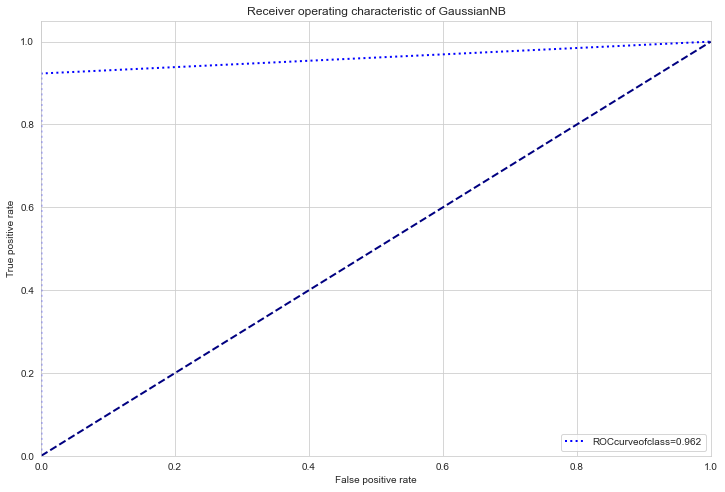

1


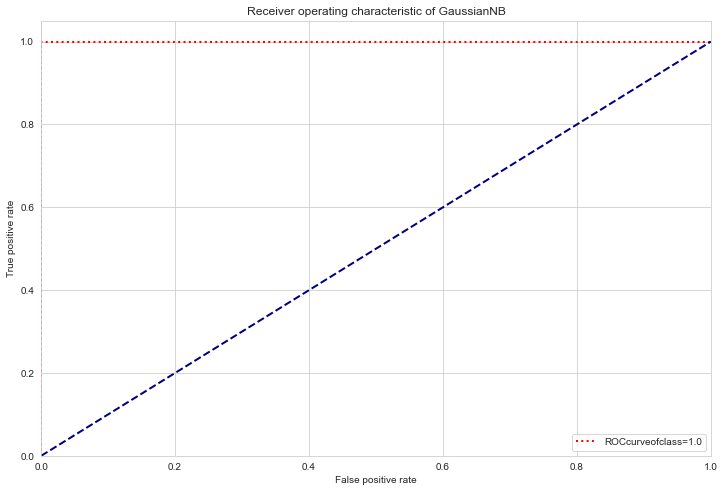

2


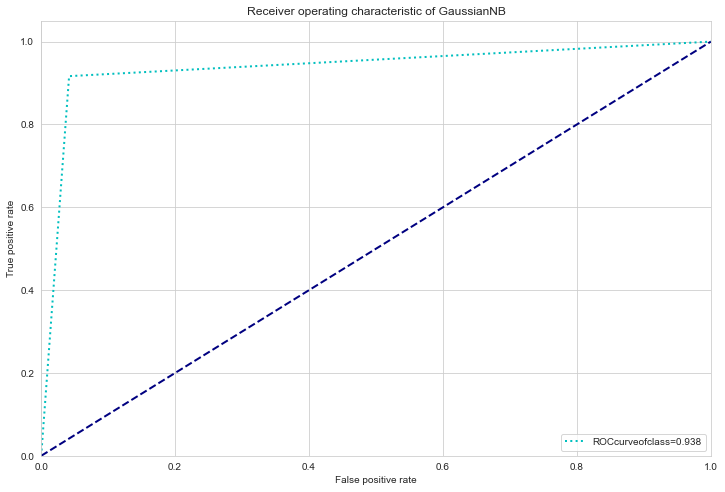

3


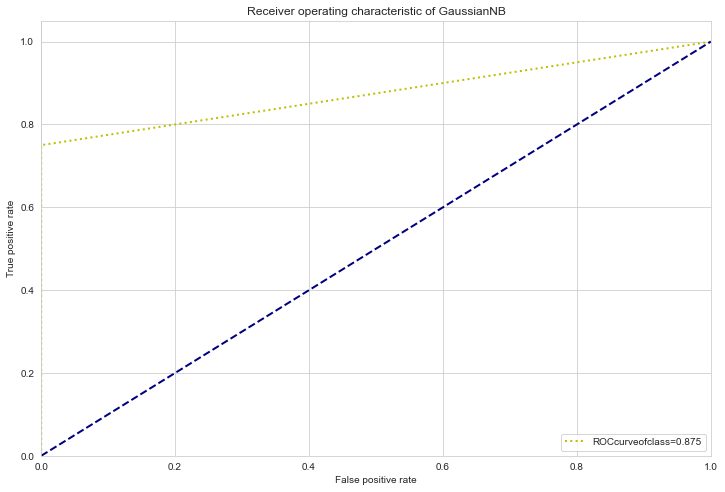

4


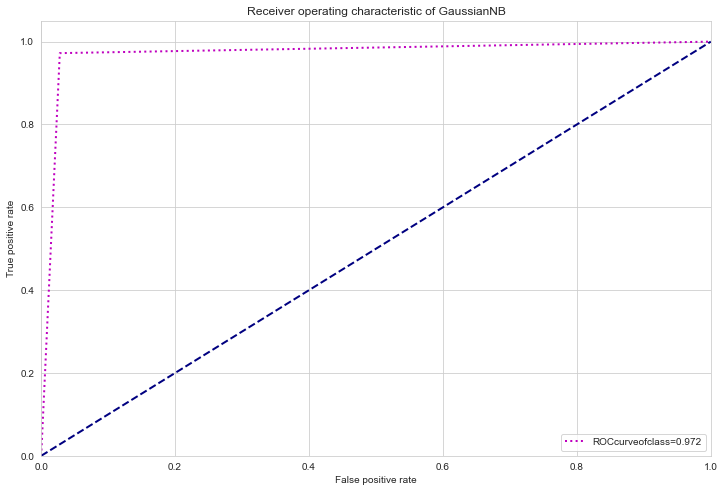

5


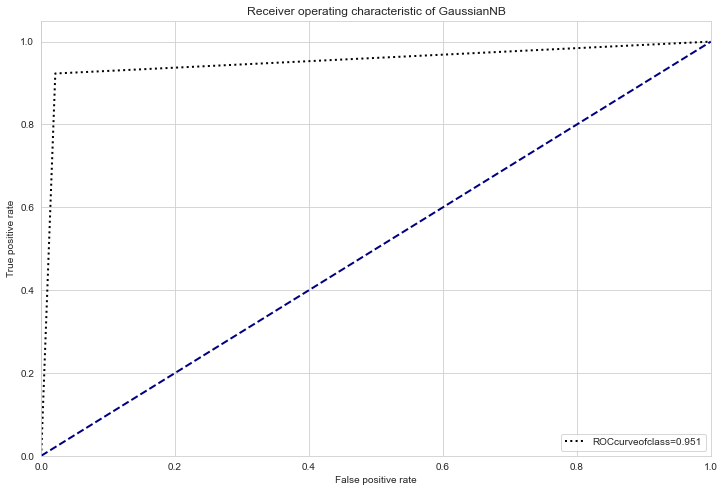

In [82]:
plt.figure()
lw=2 #line width
color=['b','r','c','y','m','k']
for i in range(n_classes):
    print(i)
    plt.plot(fpr[i],tpr[i],color=color[i],lw=lw,label="ROCcurveofclass=%s"%(np.round(roc_auc[i],3)),linestyle=":")
    plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle="--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver operating characteristic of GaussianNB")
    plt.legend(loc="lower right")
    plt.show()